### Importing Libraries

In [157]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv("RTA dataset/RTA dataset.csv")
df.shape

(12316, 32)

## EDA

In [43]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [44]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [45]:
df.dtypes.value_counts()
# This dataset has mostly catagorical features

object    30
int64      2
dtype: int64

In [46]:
df.drop(['Sex_of_casualty', 'Vehicle_driver_relation'], inplace=True, axis=1)
# Features that do not have relevance to the severity of the accident being dropped

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


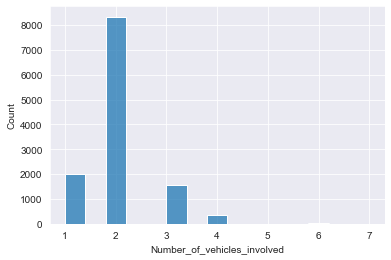

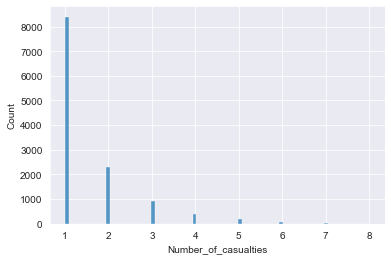

In [54]:
sns.histplot(x=df['Number_of_vehicles_involved'])
plt.show()
sns.histplot(x=df['Number_of_casualties'])
plt.show()

In [49]:
df.describe(include='object').T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


<AxesSubplot:xlabel='count', ylabel='Day_of_week'>

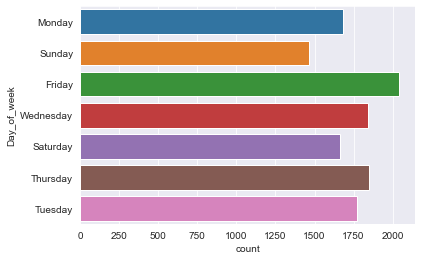

In [50]:
sns.countplot(data=df, y='Day_of_week')

In [51]:
df.isna().sum()[df.isna().sum() != 0]

Educational_level           741
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Accident_severity'>

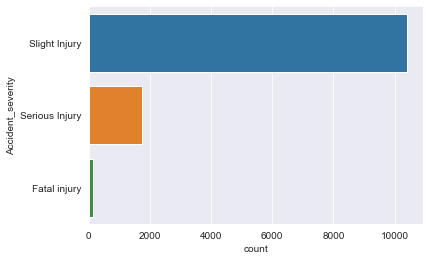

In [52]:
sns.countplot(data= df, y='Accident_severity')

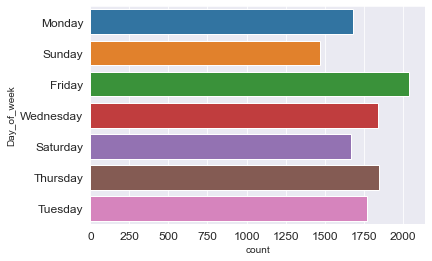

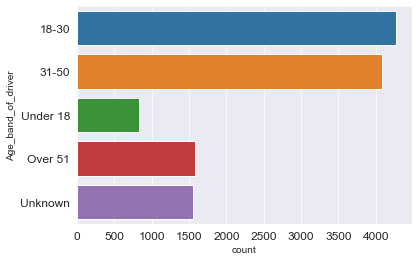

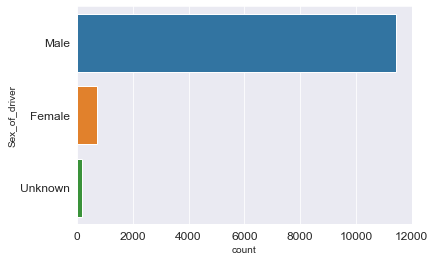

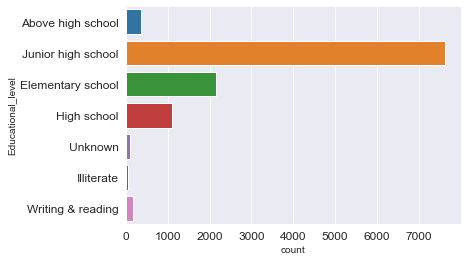

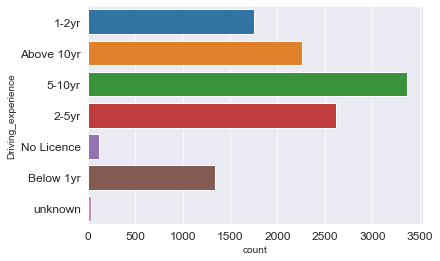

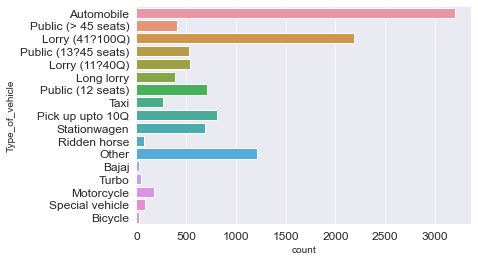

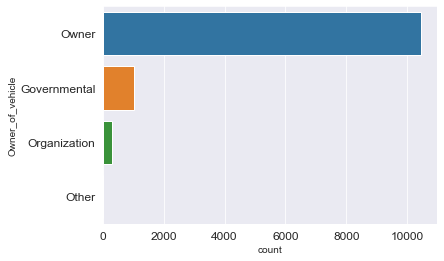

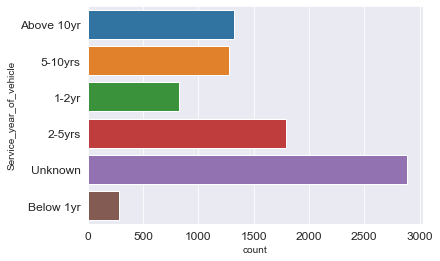

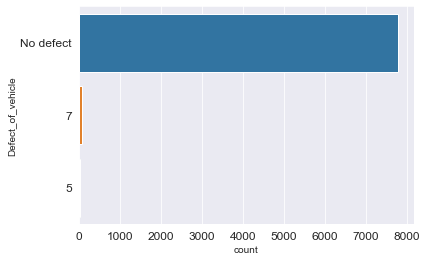

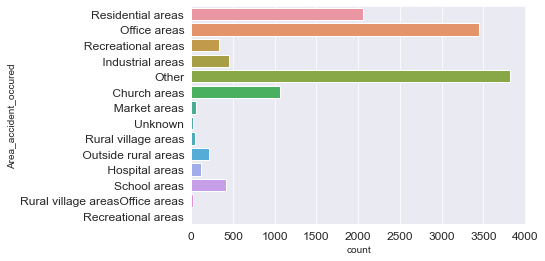

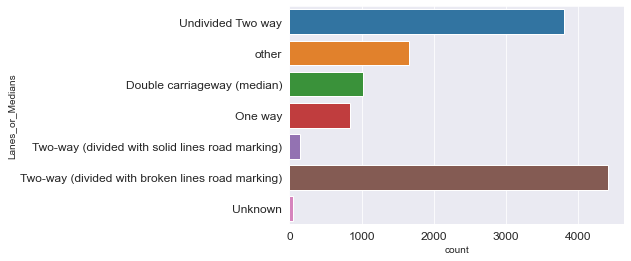

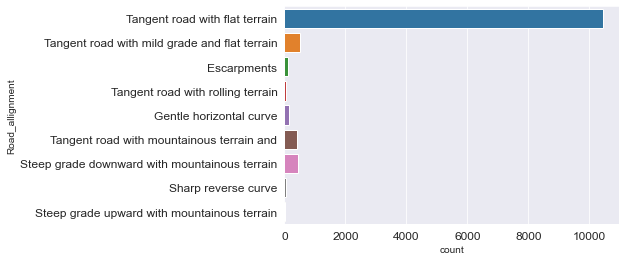

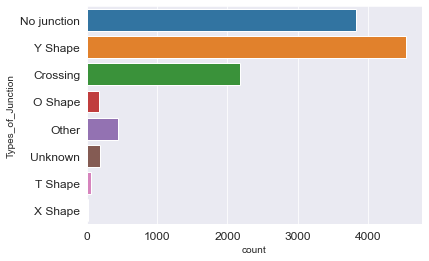

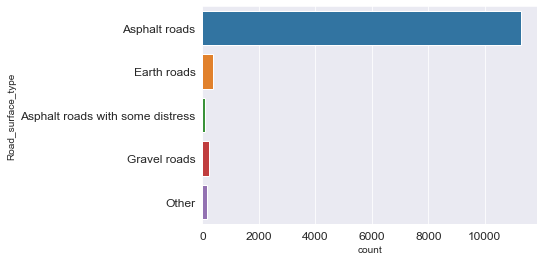

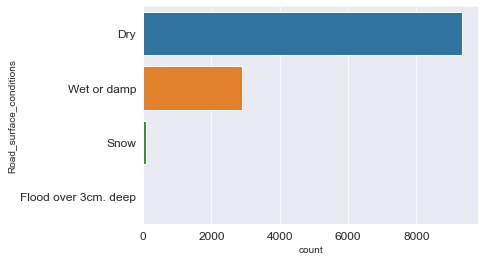

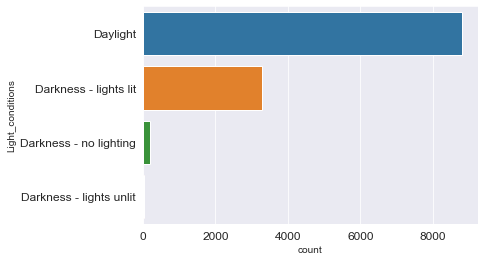

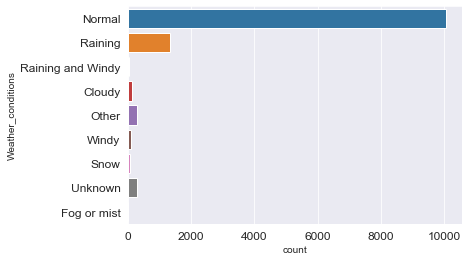

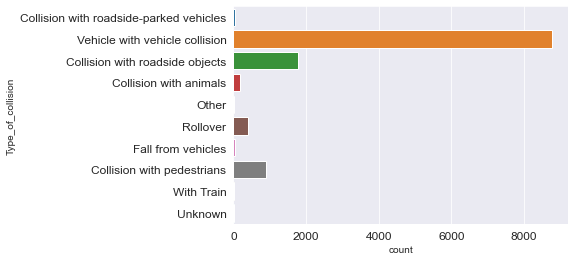

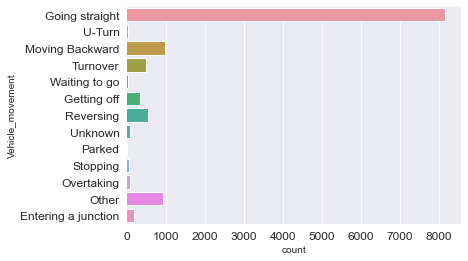

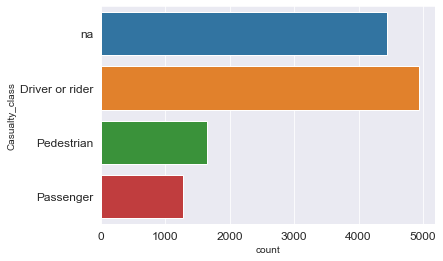

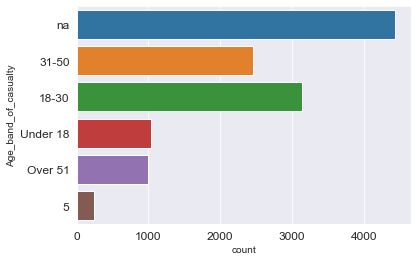

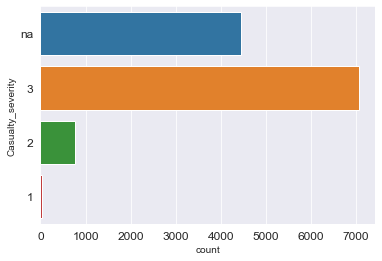

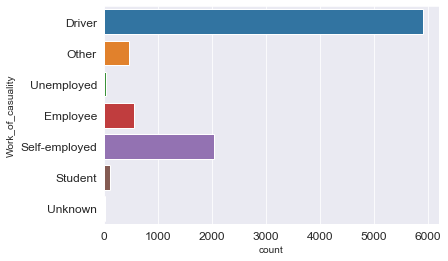

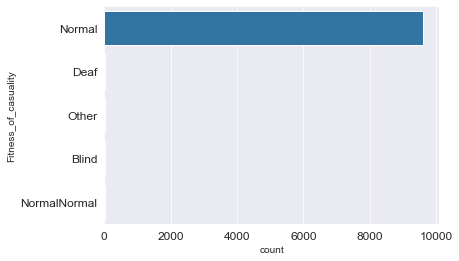

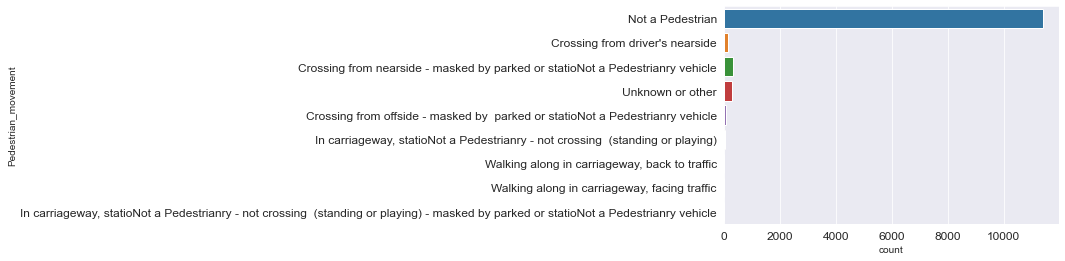

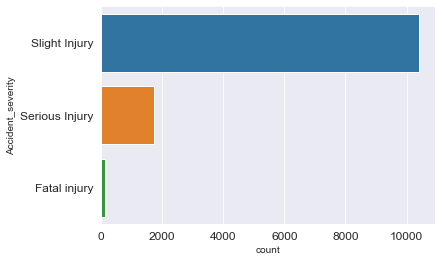

In [60]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 18:
        sns.countplot(data=df, y=col)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

## Preprocessing

In [61]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [63]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minutes'] = df['Time'].dt.minute
df.drop('Time', inplace=True, axis=1)

In [64]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Casualty_class,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minutes
0,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,...,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,5-10yrs,No defect,Recreational areas,...,Driver or rider,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,5-10yrs,No defect,Office areas,...,Pedestrian,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,2-5yr,Public (> 45 seats),Owner,5-10yrs,No defect,Industrial areas,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1,6


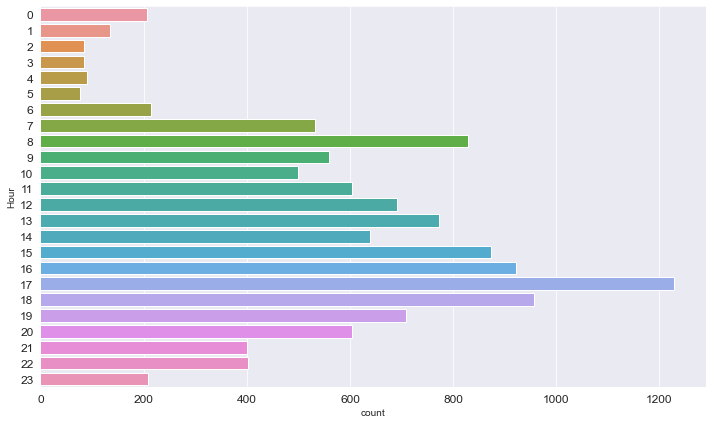

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

## Encoding

In [66]:
def ordinal_encoding(df, feats):
    for feat in feats:
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)

    return df

In [67]:
df = ordinal_encoding(df, df.drop(['Accident_severity'], axis=1).columns)

In [68]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Casualty_class,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minutes
0,2,1,2,1,1,1,4,4,3,10,...,4,6,4,1,3,6,10,Slight Injury,18,3
1,2,2,2,5,4,12,4,3,3,7,...,4,6,4,1,3,6,17,Slight Injury,18,3
2,2,1,2,5,1,6,4,3,3,2,...,1,2,3,1,3,6,1,Serious Injury,18,3
3,4,1,2,5,3,12,1,3,3,7,...,3,1,3,1,3,6,2,Slight Injury,2,7
4,4,1,2,5,2,12,4,3,3,5,...,4,6,4,1,3,6,17,Slight Injury,2,7


## Train Test Split

In [70]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8621, 30) (8621,) (3695, 30) (3695,)


## Up-samling

In [72]:
counter = Counter(y_train).items()
print(counter)

dict_items([('Slight Injury', 7324), ('Serious Injury', 1191), ('Fatal injury', 106)])


In [73]:
for i, j in counter:
    perc = j/len(y_train)
    print(f'{i} : {perc*100:.2f}%')

Slight Injury : 84.96%
Serious Injury : 13.82%
Fatal injury : 1.23%


In [74]:
smote = SMOTE()

In [75]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [76]:
counter = Counter(y_train).items()
for i, j in counter:
    perc = j/len(y_train)
    print(f'{i} : {perc*100:.2f}%')

Slight Injury : 33.33%
Serious Injury : 33.33%
Fatal injury : 33.33%


In [77]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21972, 30) (21972,) (3695, 30) (3695,)


In [78]:
y_train.head()

0     Slight Injury
1    Serious Injury
2    Serious Injury
3     Slight Injury
4    Serious Injury
Name: Accident_severity, dtype: object

## Baseline Modeling

In [117]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print(f'The accuracy of classifier is {accuracy_score(y_test,predictions)*100:.2f}%')
    
    return None

In [170]:
xgb = XGBClassifier(n_estimators= 200,min_samples_split=3,max_depth= 5,criterion= 'gini',ccp_alpha= 0.0)
rf = RandomForestClassifier()
tree = DecisionTreeClassifier()
xtree = ExtraTreesClassifier()

In [ ]:
train_model(xgb, X_train, y_train, X_test, y_test)

[16:01:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "ccp_alpha", "criterion", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:01:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [120]:
train_model(tree, X_train, y_train, X_test, y_test)

                precision    recall  f1-score   support

  Fatal injury       0.09      0.19      0.12        52
Serious Injury       0.23      0.36      0.28       552
 Slight Injury       0.87      0.76      0.81      3091

      accuracy                           0.70      3695
     macro avg       0.40      0.44      0.41      3695
  weighted avg       0.76      0.70      0.72      3695

The accuracy of classifier is 69.58%


In [121]:
train_model(rf, X_train, y_train, X_test, y_test)

                precision    recall  f1-score   support

  Fatal injury       0.33      0.04      0.07        52
Serious Injury       0.32      0.20      0.24       552
 Slight Injury       0.85      0.93      0.89      3091

      accuracy                           0.80      3695
     macro avg       0.50      0.39      0.40      3695
  weighted avg       0.77      0.80      0.78      3695

The accuracy of classifier is 80.49%


In [169]:
train_model(xtree, X_train, y_train, X_test, y_test)

                precision    recall  f1-score   support

  Fatal injury       0.03      0.37      0.06        52
Serious Injury       0.19      0.20      0.19       552
 Slight Injury       0.85      0.69      0.76      3091

      accuracy                           0.61      3695
     macro avg       0.36      0.42      0.34      3695
  weighted avg       0.74      0.61      0.67      3695

The accuracy of classifier is 61.41%


### Clearly, XGB classifier performs the best when taking into consideration, the accuracy and f1 scores for each class. 

## Hyper parameter tuning

In [163]:
kf = StratifiedKFold(n_splits=3, random_state=101, shuffle=True).split(X=X_train, y=y_train)

In [156]:
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

gsearch = GridSearchCV(
    estimator= xgb,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=kf,
    verbose=3,
)

extree_model = gsearch.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


KeyboardInterrupt: 

In [164]:
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

gsearch = RandomizedSearchCV(
    estimator= xgb,
    param_distributions=params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=kf,
    verbose=3,
    n_iter=2
)

extree_model = gsearch.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[15:57:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "ccp_alpha", "criterion", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:57:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [166]:
(gsearch.best_params_, gsearch.best_score_)

({'n_estimators': 200,
  'min_samples_split': 3,
  'max_depth': 5,
  'criterion': 'gini',
  'ccp_alpha': 0.0},
 0.9302947140616435)